📊 Basic Sales Summary:

    product  total_quantity    revenue
0  Keyboard              30    46000.0
1    Laptop              16  1132000.0
2   Monitor              18   214000.0
3     Mouse              50    26000.0


<Figure size 800x500 with 0 Axes>

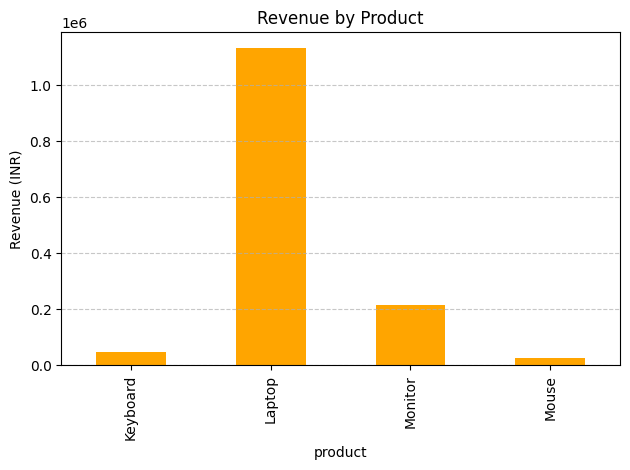

In [2]:
# Task 7: Get Basic Sales Summary using SQLite in Python
# Step 1: Import required libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# 🛠️ Step 2: Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
# Step 3: Create a 'sales' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Step 4: Insert some dummy sales data
dummy_data = [
    ('Laptop', 5, 70000),
    ('Mouse', 15, 500),
    ('Keyboard', 10, 1500),
    ('Monitor', 7, 12000),
    ('Laptop', 3, 72000),
    ('Mouse', 10, 550),
    ('Keyboard', 5, 1600),
    ('Monitor', 2, 11500)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", dummy_data)
conn.commit()

# Step 5: SQL Query for basic sales summary
query = '''
SELECT
    product,
    SUM(quantity) AS total_quantity,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
'''

# Step 6: Load result into pandas dataframe
df = pd.read_sql_query(query, conn)

# Step 7: Print the result
print("📊 Basic Sales Summary:\n")
print(df)

# Step 8: Plot revenue by product
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save chart
plt.show()

# Step 9: Close connection
conn.close()
